# Tehtävä 1
### Aihe: Keras Functional API:n käyttö
2,5 pistettä

1. Luo alla olevan kuvan mukainen neuroverkko, jossa on useampi sisääntulo.
    * Kerroksien neuronien määrällä tai aktivaatiofunktiolla ei ole väliä, määritä ne itse vapaasti.
2. Aja "Tehtävän vastaukset" solu

Vinkkejä:
* Käytä concatenate - kerrosta yhdistääksesi Input2 ja sitä edeltävän Densen ulostulo. Sama homma Input3:lle. Katso esimerkki materiaalista Keras - otsikon alta.
* Add kerroksen dokumentaatio: https://www.tensorflow.org/api_docs/python/tf/keras/layers/add?hl=th

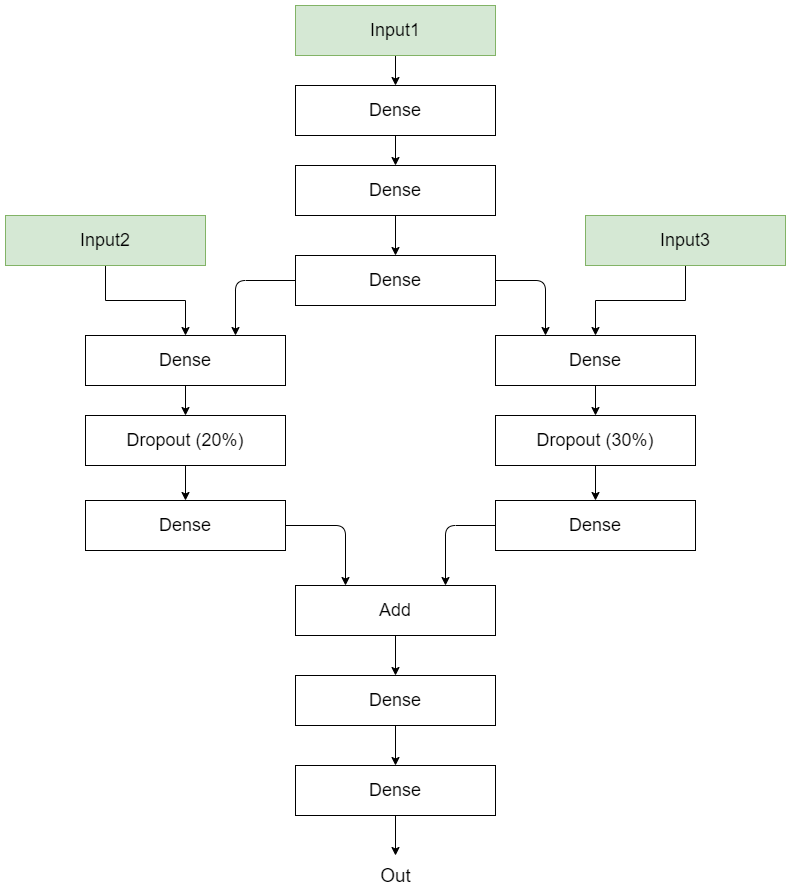

In [1]:
from IPython.display import Image
Image('../img/keras_functional_tehtävä.png')

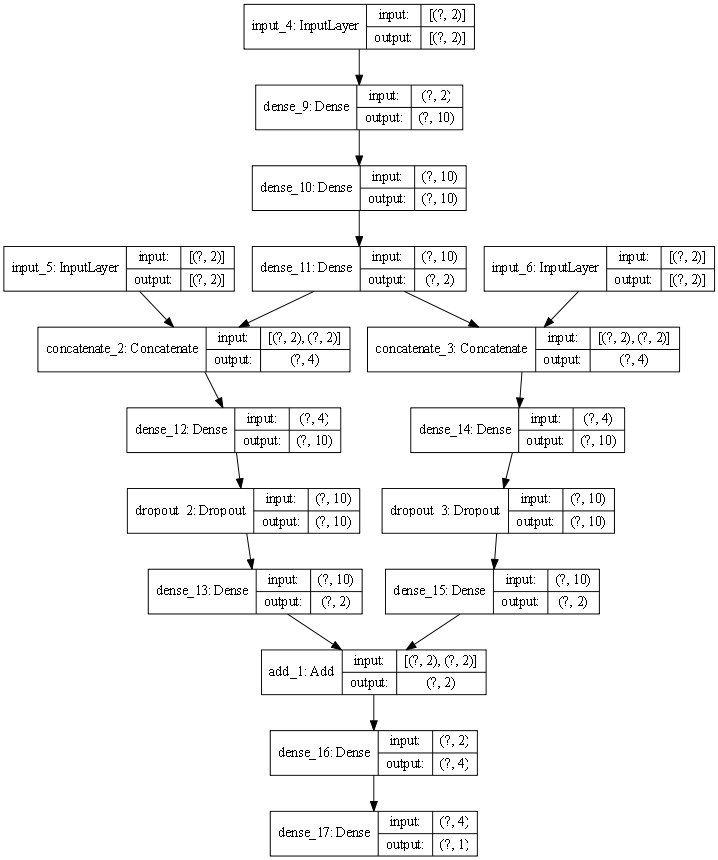

In [3]:
# Tehtävän toteutus
import tensorflow as tf

# Jos käytät Windowsia ja Anaconda - paketinhallintaa:
# Voit korjata "Graphviz executable not found" virheen määrittelemällä Graphviz exe - tiedostojen sijainnit käsin alla olevalla komennolla
import os
#os.environ['PATH'] = os.environ['PATH']+';'+ os.environ['CONDA_PREFIX'] + r"\pkgs\graphviz-2.38-hfd603c8_2\Library\bin\graphviz"

# Model 1; sisääntulo, kaksi piilotettua ja ulostulokerros 2:lle
model1_input = tf.keras.Input(shape=(2,))
model1_dense1 = tf.keras.layers.Dense(10,activation='relu')(model1_input)
model1_dense2 = tf.keras.layers.Dense(10,activation='relu')(model1_dense1)
model1_output = tf.keras.layers.Dense(2,activation='linear')(model1_dense2)
    
# Model 2
model2_input = tf.keras.Input(shape=(2,))
model2_concat = tf.keras.layers.concatenate([model2_input, model1_output])
model2_dense1 = tf.keras.layers.Dense(10,activation='relu')(model2_concat)
model2_dropout = tf.keras.layers.Dropout(0.2, input_shape=(10,))(model2_dense1)
model2_output = tf.keras.layers.Dense(2,activation='relu')(model2_dropout)

# Model 3
model3_input =tf.keras.Input(shape=(2,))
model3_concat = tf.keras.layers.concatenate([model3_input, model1_output])
model3_dense1 = tf.keras.layers.Dense(10,activation='relu')(model3_concat)
model3_dropout = tf.keras.layers.Dropout(0.2, input_shape=(10,))(model3_dense1)
model3_output = tf.keras.layers.Dense(2,activation='relu')(model3_dropout)

# Yhdistetään Model2 ja Model3 ulostulot
model4_concat = tf.keras.layers.add([model2_output, model3_output])
model4_dense1 = tf.keras.layers.Dense(4,activation='relu')(model4_concat)
model4_output = tf.keras.layers.Dense(1,activation='sigmoid')(model4_dense1)

# Määritellään sisääntulot ja ulostulot
model_functional = tf.keras.Model(inputs=[model1_input, model2_input, model3_input],
                               outputs=model4_output)

# Piirretään lopputuotos
tf.keras.utils.plot_model(model_functional, dpi=70, show_shapes=True)

In [4]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita luomasi malli model_functional - muuttujaan.
model_functional.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 10)           30          input_4[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 10)           110         dense_9[0][0]                    
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 2)]          0                                            
_______________________________________________________________________________________

# Tehtävä 2
### Aihe: Konvoluutioneuroverkko ja feature - matriisit
2,5 pistettä

1. Lataa MNIST datasetti.
2. Luo konvoluutioneuroverkko, joka vie klassifiointikerroksille 32 feature - matriisia, joiden korkeus ja leveys on 6.
3. Todista neuroverkon toimivuus kouluttamalla MNIST datasettiä muutama epookki.
4. Aja "Tehtävän vastaukset" solu

Vinkkejä:
* Käytä useita konvoluutio ja Max Pooling - kerroksia saavuttaaksesi oikean korkeuden ja leveyden feature - matriiseille. Käytä apuna ulostulon laskukaavoja materiaaleista.
    * Mahdollisia yhdistelmiä on monta, ei yhtä ainoaa ratkaisua. 
* Jos koneellasi loppuu muisti kesken tai konvoluutioverkon koulutus kestää liian kauan, pienennä MNIST datasetin kokoa esim. kymmenesosaan.
* Klassifikaatiokerrokset = Flatten, Dense kerrokset konvoluutiokerrosten jälkeen.

In [1]:
# Tehtävän toteutus
from IPython.display import Image
import tensorflow as tf


# Lataa MNIST datasetti.
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()

# kutistetaan 10-osaan
train_slice = 6000
test_slice = 1000
train_X = train_X[:train_slice,:]
train_y = train_y[:train_slice]
test_X = test_X[:test_slice,:]
test_y = test_y[:test_slice]

# lisätään väriavaruus 1 - mustavalko
train_X = train_X.reshape((train_X.shape[0],28,28,1))

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)
# (60000, 28, 28, 1)

# Luo konvoluutioneuroverkko, joka vie klassifiointikerroksille 32 feature - matriisia, joiden korkeus ja leveys on 6.
layer_input = tf.keras.Input(shape=(28,28,1)) 
#model_input = tf.keras.Input(shape=(train_X.shape[1],train_X.shape[2],1)) 
# konvoluutiokerros
layer_conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=1, padding='same')(layer_input)
layer_maxpool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(layer_conv1)
layer_maxpool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(layer_maxpool1)
layer_conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=1, padding='valid')(layer_maxpool2)

print(layer_input)
print(layer_conv2)

layer_flatten = tf.keras.layers.Flatten()(layer_conv2)
layer_output = tf.keras.layers.Dense(1, activation='softmax')(layer_flatten)

# model_output = tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=1, padding='valid')(model_maxpool2)
model_mnist = tf.keras.Model(inputs=layer_input,
                        outputs=layer_output)

# Todista neuroverkon toimivuus kouluttamalla MNIST datasettiä muutama epookki.
model_mnist.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['categorical_accuracy'])

model_mnist.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=4, batch_size=100)
ennuste = model_mnist.predict(test_X)
#print(ennuste)

(6000, 28, 28, 1)
(6000,)
(1000, 28, 28)
(1000,)
Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
Tensor("conv2d_1/BiasAdd:0", shape=(None, 6, 6, 32), dtype=float32)
Epoch 1/4
60/60 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 2/4
60/60 [==============================] - 1s 18ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 3/4
60/60 [==============================] - 1s 17ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 4/4
60/60 [==============================] - 1s 18ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000


In [2]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 

# Sijoita layer_output muuttujaan sen konvoluutikerroksen ulostulon muoto, missä kerroksesta tulee ulos 32 feature matriisia, joiden korkeus ja leveys on 6
# Esim. layer_output = model.layers[5].output.shape
print(layer_output)
# Sijoita luomasi malli model_mnist - muuttujaan.
model_mnist.summary()

Tensor("dense/Softmax:0", shape=(None, 1), dtype=float32)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          4128      
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
______________________________________________________________

# Tehtävä 3
### Aihe: Siirto-oppiminen
2,5 pistettä

1. Luo alla olevan kuvan mukainen neuroverkkomalli.
2. Lataa malliin painoarvot "weights.h5" tiedostosta.
3. Aja tehtävän viimeinen "Vastaukset" solu.

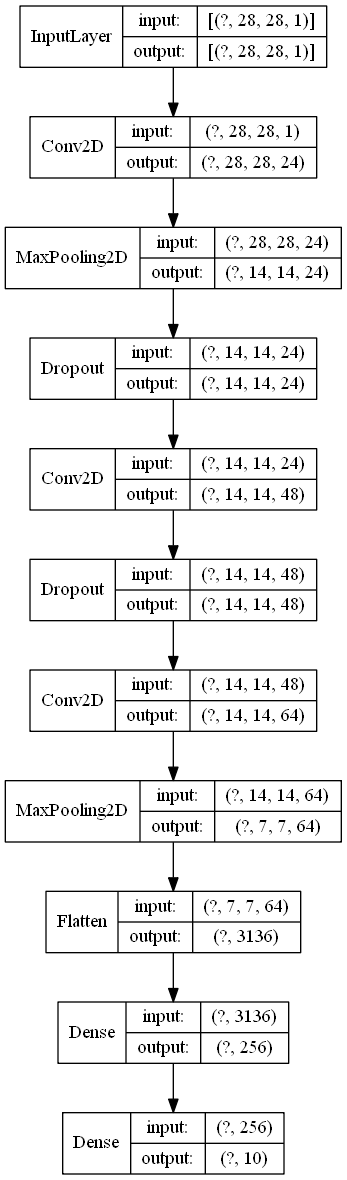

In [2]:
Image('../img/cnnmalli.png')

Vinkkejä:
* Katso konvoluutiokerroksen ulostulosta, kuinka monta filtteriä tulisi määrittää.
* Konvoluutiokerroksissa kernelin koko on (5,5). Katso materiaaleista, mikä padding ja stride tulee olla, että ulostulolla on sama leveys ja korkeus kuin sisääntulolla.
* MaxPooling2D:ssä pool_size on (2,2). Mikä tulee olla askel (strides) parametri, että sisääntulo puolittuu?
* Dropout deaktivoi ensimmäisessä Dropout - kerroksessa 20% neuroneista ja toisessa 40%.

In [ ]:
# Tehtävän toteutus

In [ ]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita luomasi malli model_cnn - muuttujaan
model_cnn.summary()

# Tehtävä 4
### Aihe: Siirto-oppiminen
2,5 pistettä
 
1. Lataa Fashion MNIST datasetti ajamalla tehtävän ensimmäinen solu.
2. Poista äskeisessä tehtävässä luodusta mallista klassifikaatiokerrokset. (eli Flatten ja kaikki sen jälkeiset kerrokset)
3. Jäädytä loput kerrokset.
4. Luo klassifikaatiokerrokset ja lisää ne malliin.
5. Kouluta mallia Fashion MNIST datasetillä muutama kierros (epoch) käyttäen train_X ja train_y koulutusdataa.
6. Aja tehtävän viimeinen "Vastaukset" solu. 

Vinkkejä:
* Fashion MNIST on MNISTin tapainen datasetti
    * Muokkaa Fashion MNIST datasetin kuvien muoto, jotta ne voi syöttää neuroverkolle.
* Käy neuroverkon kerrokset läpi ja muuta kerrosten 'trainable' parametriä. Näin voit jäädyttää kerroksen.
* Klassifikaatiokerrokset = Flatten, Dense kerrokset.

In [ ]:
(train_X, train_y, test_X, test_y) = tf.keras.datasets.fashion_mnist.load_data()
# Tehtävän toteutus tähän

In [ ]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita results - muuttujaan funktion model.evaluate() tulos.
# Muista määrittää model.compile() - funktioon seurattavaksi suureeksi metrics=['accuracy'], jotta näät, kuinka suuri osa neuroverkon ennustuksista on oikein.
print(f"Test Loss:{results[0]} Test Accuracy:{results[1]*100}%")